In [ ]:
# PCA (Principal Component Analysis)

# Principal component analysis (PCA) is a method of reducing the dimensionality of data and is used to improve data visualization and speed up machine learning model training.
# Çok boyutlu datalar 2 ya da 3 boyuta indirgenerek görselleştirme kolaylaştırılabilir ve data daha iyi anlaşılabilir.
# Amaç hızlandırmak değil, sonuç olarak hızlanıyor zaten.

In [ ]:
# Python'da PCA uygulamak için genellikle scikit-learn kütüphanesi kullanılır.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:

cancer_data = load_breast_cancer()

X = cancer_data.data
y = cancer_data.target

feature_names = cancer_data.feature_names
target_names = cancer_data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(feature_names)
print(target_names)
print( df.head())

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.

In [ ]:
# target kısmında 0 iyi huylu, 1 kötü huylu anlamına kanser anlamına gelir.

##### PCA'nın doğru çalışması için verilerin standartlaştırılması gerekmektedir.

scaler = StandardScaler() #StandardScaler kullanarak verileri standartlaştırmak, veriler üzerindeki her bir özelliği ortalamasını sıfır ve standart sapmasını bir yapacak şekilde dönüştürür. Bu işlem, makine öğrenme algoritmalarının daha iyi performans göstermesine ve verinin çeşitli analizlerde daha anlamlı hale gelmesine yardımcı olabilir.
X_scaled = scaler.fit_transform(X)

In [ ]:

pca = PCA(n_components=2)  # İki bileşenli PCA
X_pca = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [ ]:

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


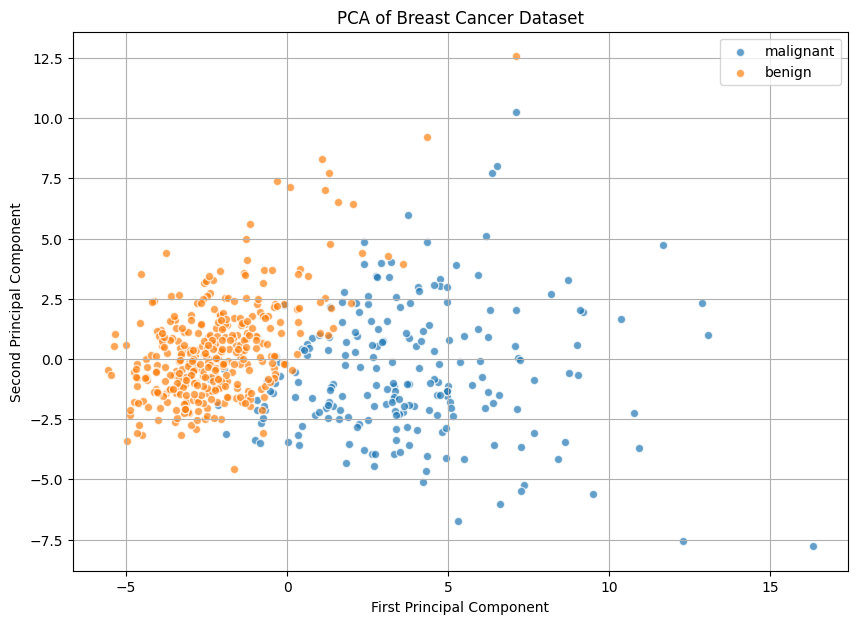

In [ ]:

plt.figure(figsize=(10, 7))

for target in np.unique(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                label=target_names[target], alpha=0.7, edgecolors='w')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()
# 2 az gelebilir, karmaşık gözükürse component sayısını artırabiliriz.

In [ ]:
# Varyans oranları
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
print("Toplam açıklanan varyans:", np.sum(explained_variance_ratio)) # TOPLAM VARYANS ÖNEMLİDİR. İKİ PCA TOPLAMI %63 ETTİĞİ İÇİN TOPLAM BİLGİNİN %63'Ü ELDE TUTULUR,YANİ BİLGİNİN %37'Sİ KAYBOLMUŞTUR ÇÜNKÜ 30 BOYUTTAN 2 BOYUTA İNDİRGEME YAPTIK.
# Component sayısı artırıldığında bilgi kaybı az olur.

[0.44272026 0.18971182]
Toplam açıklanan varyans: 0.6324320765155944


In [ ]:
# PCA bileşenlerinin özelliklerle ilişkisi
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2'])
print(components_df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   

     worst concavity  worst concave points  worst symmetry  \
PC1         0.228768              0.250886        0.122

In [ ]:
# Bir diğer pca uygulama yolu ise logistic regression uygulamaktır.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95) # Bu, scikit-learn'ün varyansın %95'inin korunduğu minimum sayıda temel bileşeni seçtiği anlamına gelir.Bilgilerin %95'i duruyor.
# bu oran doğru orantı vermez en yüksek doğruluk oranını deneyerek buluruz.

In [ ]:
pca.fit(train_img)


PCA(n_components=0.95)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['0'], dtype=object)

In [ ]:
# Predict for Ten Observation (image)
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
logisticRegr.score(test_img, test_lbl)


0.9201

In [ ]:
# DATA SPLITING

# Makine öğrenmesinde veri bölme (data splitting), veri setini eğitim (training) ve test (test) kümelerine ayırma sürecidir. Bu işlem, modelin performansını değerlendirmek ve aşırı uyumu (overfitting) önlemek için kritik öneme sahiptir.
# Overfitting, eğitim verilerinde çok iyi performans gösteren ancak görülmemiş veya yeni verilerde kötü performans gösteren bir modelle sonuçlanır.

# Neden Veri Bölme Gereklidir?
# Modelin Genelleme Yeteneğini Test Etmek: Modelin eğitim verisi dışındaki yeni veriler üzerinde nasıl performans gösterdiğini anlamak için test veri seti kullanılır.
# Aşırı Uyumu Önlemek: Eğitim veri seti üzerinde yüksek performans gösteren bir model, test veri setinde zayıf performans gösterebilir. Bu, modelin eğitim verisine fazla uyum sağladığını (aşırı uyum) gösterir.
# Model Seçimi ve Parametre Ayarlama: Modelin hiperparametrelerini ayarlamak için genellikle doğrulama (validation) veri seti kullanılır.

# Veri Bölme Stratejileri

# Eğitim ve Test Ayrımı: Veriyi basitçe iki kümeye ayırır: eğitim ve test. Bu, en yaygın ve temel veri bölme yöntemidir.
# K-Fold Çapraz Doğrulama (Cross-Validation): Veriyi K parçaya böler ve her bir parçayı test seti olarak kullanarak modelin performansını değerlendirir. Bu, modelin genelleme yeteneğini daha güvenilir şekilde ölçmek için kullanılır.
# Eğitim, Doğrulama ve Test Ayrımı: Veriyi üç kümeye böler: eğitim, doğrulama (validation) ve test. Doğrulama seti, modelin hiperparametrelerini ayarlamak için kullanılır, test seti ise modelin nihai değerlendirmesi için ayrılır.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# Rastgele Bölme

# Rastgele bölme, veri setini eğitim, doğrulama ve test kümelerine rastgele bölen yaygın olarak kullanılan bir yöntemdir.

# Eğitim Seti: Makine öğrenimi modelini eğitmek için kullanılır, modelin verilerdeki kalıpları ve ilişkileri anlamayı öğrendiği temel veri kümesidir.

# Doğrulama Seti: Modelin ince ayarını yapmaya yardımcı olur. Eğitim aşamasında modelin performansını değerlendirir, hiper parametreleri ayarlamaya ve aşırı uyumu önlemeye yardımcı olur.

# Test Seti: Modelin görünmeyen veriler üzerindeki performansının adil bir değerlendirmesini sağlar. Bu, modelin bilinmeyen verilere genelleme yapma yeteneğini değerlendirmek için çok önemlidir.

In [ ]:
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # eğitim ve test seti
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.5, random_state=42) # eğitim ve doğrulama seti
# Normalde bu datada 569 sample var, biz bunu bölüyoruz.569'un %30'unu teste tabi tutuyoruz,geri kalan eğitim seti oluyor.
print("Eğitim Seti Boyutu:", X_train.shape)
print("Test Seti Boyutu:", X_test.shape)
print("Doğrulama Seti Boyutu:", X_val.shape)

# Oluşturulan veri kümeleri, makine öğrenimi modellerinin eğitimi, doğrulanması ve değerlendirilmesi için kullanılabilir ve böylece etkili ve güvenilir modellerin geliştirilmesi kolaylaştırılabilir.

Eğitim Seti Boyutu: (199, 30)
Test Seti Boyutu: (171, 30)
Doğrulama Seti Boyutu: (199, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Modeli oluşturma
model = LogisticRegression(max_iter=10000, random_state=42) # Lojistik regresyon modelinin maksimum iterasyon sayısını belirler. Model, maksimum bu kadar iterasyon boyunca eğitilecektir. Bu, modelin öğrenme sürecinde daha fazla iterasyon yapılmasını sağlar ve genellikle modelin konverjansını sağlamaya yardımcı olabilir.
model.fit(X_train, y_train) #X_train: Özelliklerin eğitim veri seti, y_train: Eğitim veri setindeki hedef etiketler.

# Test seti üzerindeki tahminler
y_pred = model.predict(X_test)

# Performans
accuracy = accuracy_score(y_test, y_pred)
print("Test Seti Üzerindeki Doğruluk:", accuracy)

Test Seti Üzerindeki Doğruluk: 0.9707602339181286


In [ ]:
# Katmanlı Bölme

# Dengesiz veri kümeleriyle uğraşırken, tabakalı bölme, eğitim, doğrulama ve test kümeleri arasında sınıf dağılımında tutarlılığı garanti eder.
# Katmanlı bölme (stratified splitting), veri setini sınıfların orantısına göre böler, böylece her alt kümede sınıfların orantıları orijinal veri setine benzer olur.
# dengesiz veriler, dolandırıcılık tespiti, tıbbi teşhis ve anormallik tespiti dahil olmak üzere çeşitli alanlarda yaygındır.
# Eğitim, doğrulama ve test kümeleri arasında tutarlı bir sınıf dağılımını sürdürmek için katmanlı bölmenin uygulanması çok önemlidir.

In [ ]:
# Veriyi eğitim ve test setlerine ayırma (katmanlı bölme)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Eğitim ve test setlerinin sınıf dağılımları
train_class_distribution = pd.Series(y_train).value_counts(normalize=True)
test_class_distribution = pd.Series(y_test).value_counts(normalize=True)

# Sınıf Dağılımını Kontrol Etme: Eğitim ve test setlerinde her sınıfın orantısının orijinal veri setine benzer olduğunu doğrulamak için kullanılır.

print("Eğitim Seti Sınıf Dağılımı:\n", train_class_distribution)
print("\nTest Seti Sınıf Dağılımı:\n", test_class_distribution)

Eğitim Seti Sınıf Dağılımı:
 1    0.628141
0    0.371859
Name: proportion, dtype: float64

Test Seti Sınıf Dağılımı:
 1    0.625731
0    0.374269
Name: proportion, dtype: float64


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Creating a synthetic imbalanced dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # Features
y = np.random.choice([0, 1], 100, p=[0.9, 0.1])  # Imbalanced labels with 90% in class 0 and 10% in class 1

# Stratified split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
for train_index, test_index in stratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Now, you have X_train, X_test, y_train, and y_test for your model training and evaluation

Original Class Distribution:
Class 0: 90, Class 1: 10

Training Set Class Distribution:
Class 0: 63, Class 1: 7

Validation Set Class Distribution:
Class 0: 13, Class 1: 2

Test Set Class Distribution:
Class 0: 14, Class 1: 1



AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# Zaman Serisi Bölme
# BUNA DAHA SONRA BAKILACAK!

# Zaman serisi verileri için zaman serisi bölünmesi, veri bölümlendirme sırasında kronolojik sıranın korunmasını sağlar. Zaman serisi bölünmesi, günlük hisse senedi fiyatları, aylık hava durumu kayıtları veya saatlik web sitesi trafiği verileri gibi farklı zaman noktalarında kaydedilen bir dizi gözlemden oluşan zaman serisi verilerini işlemek için özel olarak tasarlanmış bir yöntemdir. Zaman serisi verilerinin benzersiz zorluğu, gözlemler genellikle önceki sonuçlara bağlı olduğundan veri noktalarının sırasının çok önemli olmasıdır.

# Bu bağlamda, zaman serisi bölünmesi değerlidir. Veri setini eğitim, doğrulama ve test için alt kümelere ayırmak, verilerin zamansal sırasının korunmasını sağlar.

#Örneğin, bir yıl için günlük verileriniz varsa, her parça bir haftaya veya bir aya karşılık gelir.
#Bu tür zaman serisi bölünmesi, zaman serisi verileri için kritik öneme sahiptir çünkü gelecekteki tahminlerin yalnızca geçmiş olaylara dayalı olabildiği gerçek dünya senaryolarını taklit eder.
#Bu kronolojik sırayı koruyarak, zaman serisi bölme işlemi geçmiş verileri kullanarak modelleri eğitmenize ve güncellenmiş verileri kullanarak modelleri doğrulamanıza olanak tanır ve modelin performansını gerçek dünya ortamında simüle etmenizi sağlar.

In [ ]:
# Zaman serisi bölünmesinde, test kümeleri her zaman eğitim kümelerinden "daha genç" veya daha sonradır. Rastgelelik, eğitim ve test kümelerinin boyutlarından kaynaklanır.

In [ ]:
import pandas as pd
import numpy as np

date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')

np.random.seed(42)
data = np.random.rand(100, 5)  # 100 gün, 5 özellik
df = pd.DataFrame(data, columns=[f'Feature{i+1}' for i in range(5)], index=date_range)

print(df.head())

            Feature1  Feature2  Feature3  Feature4  Feature5
2020-01-01  0.374540  0.950714  0.731994  0.598658  0.156019
2020-01-02  0.155995  0.058084  0.866176  0.601115  0.708073
2020-01-03  0.020584  0.969910  0.832443  0.212339  0.181825
2020-01-04  0.183405  0.304242  0.524756  0.431945  0.291229
2020-01-05  0.611853  0.139494  0.292145  0.366362  0.456070


In [ ]:

train_end_date = '2020-07-01'
test_start_date = '2020-07-02'

# Eğitim ve test setleri
train_df = df[:train_end_date]
test_df = df[test_start_date:]

print("\nEğitim Seti:\n", train_df.head())
print("\nTest Seti:\n", test_df.head())


Eğitim Seti:
             Feature1  Feature2  Feature3  Feature4  Feature5
2020-01-01  0.374540  0.950714  0.731994  0.598658  0.156019
2020-01-02  0.155995  0.058084  0.866176  0.601115  0.708073
2020-01-03  0.020584  0.969910  0.832443  0.212339  0.181825
2020-01-04  0.183405  0.304242  0.524756  0.431945  0.291229
2020-01-05  0.611853  0.139494  0.292145  0.366362  0.456070

Test Seti:
 Empty DataFrame
Columns: [Feature1, Feature2, Feature3, Feature4, Feature5]
Index: []


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Çarpraz Doğrulama
tscv = TimeSeriesSplit(n_splits=5)

# Veriyi NumPy dizisine dönüştürme
X = df.values
y = np.random.randint(0, 2, size=len(df))

# Çapraz doğrulama uygulama
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(f"\nEğitim Seti: {train_index[0]}-{train_index[-1]}")
    print(f"Test Seti: {test_index[0]}-{test_index[-1]}")
    print(f"Eğitim Seti Boyutu: {len(train_index)}, Test Seti Boyutu: {len(test_index)}")


Eğitim Seti: 0-19
Test Seti: 20-35
Eğitim Seti Boyutu: 20, Test Seti Boyutu: 16

Eğitim Seti: 0-35
Test Seti: 36-51
Eğitim Seti Boyutu: 36, Test Seti Boyutu: 16

Eğitim Seti: 0-51
Test Seti: 52-67
Eğitim Seti Boyutu: 52, Test Seti Boyutu: 16

Eğitim Seti: 0-67
Test Seti: 68-83
Eğitim Seti Boyutu: 68, Test Seti Boyutu: 16

Eğitim Seti: 0-83
Test Seti: 84-99
Eğitim Seti Boyutu: 84, Test Seti Boyutu: 16


In [ ]:
# K-Fold Cross-Validation

# K-Katlı Çapraz Doğrulama, veri setini eşit büyüklükteki "k" kata bölerek, birden fazla eğitim ve doğrulama turuna olanak tanır.

# K-Fold Çapraz Doğrulama, makine öğrenimi modellerinin performansını ve genelleme yeteneğini değerlendirmek için güçlü bir tekniktir. Mevcut örneklerden en iyi şekilde yararlanarak sınırlı verilerle model performansını etkili bir şekilde değerlendirme zorluğunu ele alır.

# Veri Setini Bölme: Veri seti K eşit parçaya bölünür. Her bir parça "fold" olarak adlandırılır.
# Model Eğitimi ve Testi: K kez model eğitilir ve test edilir. Her defasında, bir parça test seti, kalan K-1 parça ise eğitim seti olarak kullanılır.
# Performans Değerlendirmesi: Her bir fold için elde edilen sonuçlar toplanır ve ortalama performans metriği hesaplanır (örneğin, doğruluk).

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

# Model
model = LogisticRegression(max_iter=10000, random_state=42)

# K-Fold Çapraz Doğrulama
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Buradaki bölünme değeri olan “k” değeri; genellikle k=5 veya k=10 olarak seçilmektedir.
# Örneğin; veri kümenizi 10 parçaya bölerseniz, her bir parça tek tek doğrulama verisi olarak kullanılır ve geri kalan 9 parça ise eğitim verisi olarak kullanılır. Bu işlem 10 kez tekrar edilir ve her seferinde farklı bir parça doğrulama verisi olarak kullanılır.Performans değerlendirmesi için ise; her seferinde elde edilen doğruluk oranlarının ortalaması alınır.

# Doğrulama skoru
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print(f"Doğruluk Skorları: {scores}")
print(f"Ortalama Doğruluk: {np.mean(scores)}")
print(f"Standart Sapma: {np.std(scores)}")

Doğruluk Skorları: [0.95614035 0.96491228 0.93859649 0.97368421 0.92035398]
Ortalama Doğruluk: 0.9507374631268437
Standart Sapma: 0.019116636583291855


In [ ]:
# Bu teknik, sınırlı veri kümeleriyle çalışılırken özellikle avantajlıdır, çünkü eğitim ve doğrulama için mevcut verilerin kullanımını en üst düzeye çıkarır ve modelin tahmin yeteneğinin daha sağlam bir tahminini sağlar.
# "k" yineleme tamamlandıktan sonra, model performansının daha istikrarlı ve temsili bir tahminini sunmak için değerlendirme sonuçlarının ortalaması alınır ve bu da genel değerlendirme üzerindeki veri bölümlendirmesinin etkisini azaltır.

In [ ]:
# Leave-One-Out Cross-Validation

# Leave-One-Out Çapraz Doğrulama, özellikle küçük veri kümeleri için uygun olan kapsamlı bir çapraz doğrulama yöntemidir.
# Bu yöntemde, N örneğin her biri bir test örneği olarak alınırken, kalan N-1 örnek eğitim seti olarak hizmet eder. Bu işlem her örnek için tekrarlanır ve N sınıflandırıcı ve N test sonucu elde edilir. Daha sonra modelin performansı bu N sonucun ortalaması alınarak değerlendirilir.
# LOOCV, çapraz doğrulama yöntemlerinin en uç hali olup, her bir veri noktasını tek tek doğrulama seti olarak kullanır ve kalan tüm veri noktalarını eğitim seti olarak kullanır.
# Hesaplama Maliyeti: Çok yüksek olabilir, özellikle büyük veri setlerinde. Her seferinde tüm veri ile eğitim yapıldığı için zaman ve hesaplama kaynakları gerektirir.
# Genelleme: Her bir örnek tek tek test edildiği için, modelin genelleme yeteneğini çok hassas bir şekilde değerlendirir.

# K Katlı çarpraz doğrulamada ise veri setini K eşit parçaya böler ve her parça bir test seti olarak kullanılırken kalan K-1 parça eğitim seti olarak kullanılır. Bu işlem K kez tekrarlanır, her seferinde farklı bir parça test seti olarak seçilir.



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

# Model
model = LogisticRegression(max_iter=10000, random_state=42)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Doğrulama skoru
scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

# Sonuçları yazdırma
print(f"Doğruluk Skorları: {scores}")
print(f"Ortalama Doğruluk: {np.mean(scores)}")
print(f"Standart Sapma: {np.std(scores)}")

Doğruluk Skorları: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1